# Assignment 6

First, we import necessary libraries.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


To load the data, whitespace will be used as the delimiter. And in this step we also specify the column names.

To remove missing value, we first replace any '?' in the dataset with NaN and then onvert the 'horsepower' column to float type, as it may contain '?' values which were replaced with NaN. Now we could remove any rows with missing values using dropna().


In [25]:
url = 'auto-mpg.txt'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model year', 'origin', 'car name']

df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Data cleansing
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


## Step 1: Split the dataset into training and test sets (80, 20).

For features, we drop "car name" as in Step 2(a) we only use feature 1-7 to fit the linear regression

In [26]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
X = df[features]  # Features (1-7)
y = df['mpg']  # Target variable (mpg)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 2(a): Use all the features (1-7) to fit the linear regression model for feature 8(MPG) using the training set.

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Step 2(b) Report the coefficients, mean squared error and variance score for the model on the test set.

In [28]:
# make prediction on the test set
y_pred = model.predict(X_test)
mse_train = mean_squared_error(y_test, y_pred)
r2_train = r2_score(y_test, y_pred)

print("Test Set Results:")
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

# Print the coefficients and intercept of the model
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")


Test Set Results:
Mean squared error:  10.710864418838362
R-squared score:  0.7901500386760352

Model Coefficients:
cylinders: -0.345788833395193
displacement: 0.015108710228018248
horsepower: -0.02130174770550661
weight: -0.006141625063946203
acceleration: 0.037950006416829773
model year: 0.7677425751829693
origin: 1.6134570704095454
Intercept: -18.499361128724797


## Step 3(a) Use each feature alone - to fit a linear regression model on the training set.
## Step 3(b) Report the coefficient, mean squared error and variance score for the model on the test set. Also report the 7 plots of the linear regression models generated on each feature. Each plot should distinctly show the training points, test points and the linear regression line.

We could perform 3(a) and 3(b) together to generate the plots

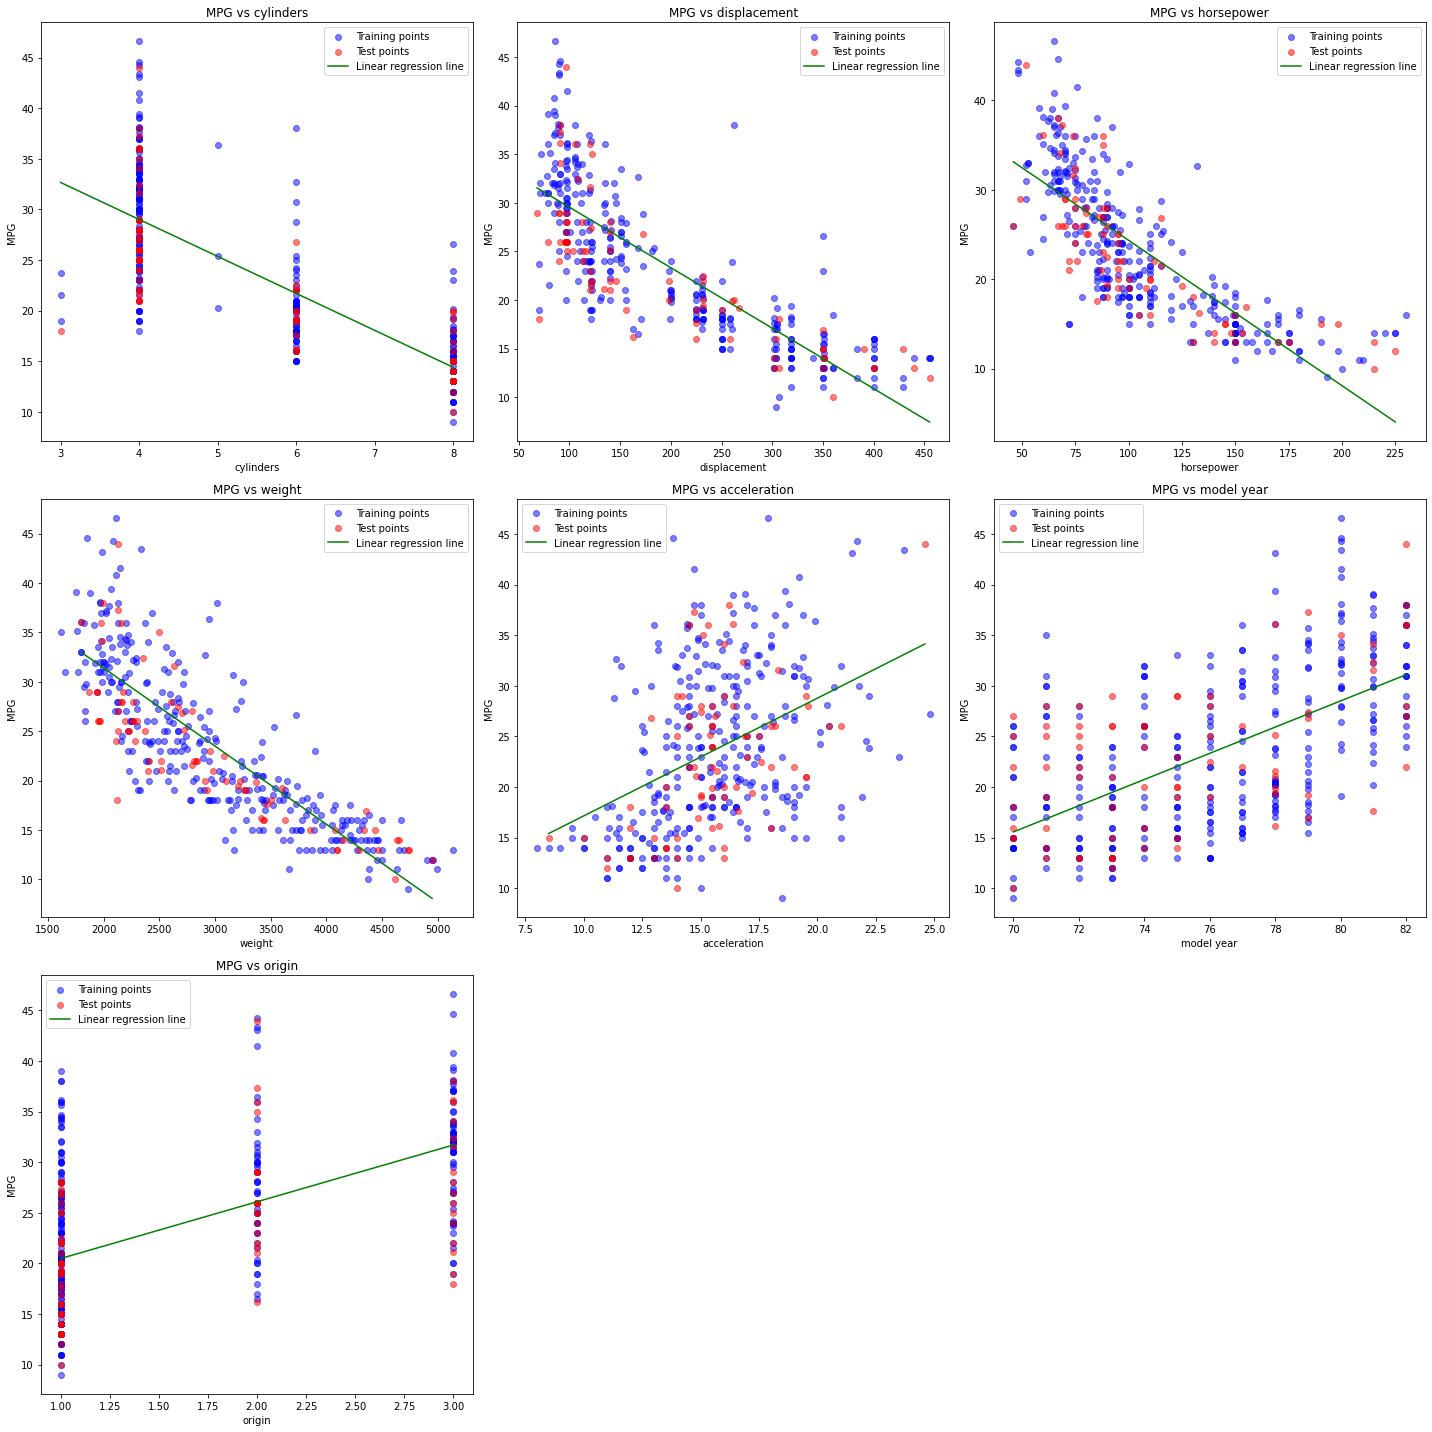

Results for each feature:

Feature: cylinders
Coefficient: -3.6522
Intercept: 43.6220
Mean Squared Error: 21.8140
Variance Score (R-squared): 0.5726

Feature: displacement
Coefficient: -0.0622
Intercept: 35.7659
Mean Squared Error: 21.2275
Variance Score (R-squared): 0.5841

Feature: horsepower
Coefficient: -0.1626
Intercept: 40.6061
Mean Squared Error: 22.1532
Variance Score (R-squared): 0.5660

Feature: weight
Coefficient: -0.0079
Intercept: 47.2005
Mean Squared Error: 17.6934
Variance Score (R-squared): 0.6533

Feature: acceleration
Coefficient: 1.1634
Intercept: 5.5150
Mean Squared Error: 40.0739
Variance Score (R-squared): 0.2149

Feature: model year
Coefficient: 1.2941
Intercept: -75.0219
Mean Squared Error: 37.4228
Variance Score (R-squared): 0.2668

Feature: origin
Coefficient: 5.6093
Intercept: 14.8718
Mean Squared Error: 36.5593
Variance Score (R-squared): 0.2837


In [29]:
results = []

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()  # Flatten the 2D array of axes

for i, feature in enumerate(features):
    # Step 3(a): Use each feature alone to fit a linear regression model on the training set
    X = df[[feature]]
    y = df['mpg']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Step 3(b): Report metrics on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'feature': feature,
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'mse': mse,
        'r2': r2
    })
    
    # Create plot
    ax = axes[i]
    ax.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training points')
    ax.scatter(X_test, y_test, color='red', alpha=0.5, label='Test points')
    
    # Sort X_test and y_pred for a smooth line plot
    X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test.values.ravel(), y_pred)))
    ax.plot(X_test_sorted, y_pred_sorted, color='green', label='Linear regression line')
    
    ax.set_xlabel(feature)
    ax.set_ylabel('MPG')
    ax.set_title(f'MPG vs {feature}')
    ax.legend()

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Results for each feature:")
for result in results:
    print(f"\nFeature: {result['feature']}")
    print(f"Coefficient: {result['coefficient']:.4f}")
    print(f"Intercept: {result['intercept']:.4f}")
    print(f"Mean Squared Error: {result['mse']:.4f}")
    print(f"Variance Score (R-squared): {result['r2']:.4f}")


## Step 4(a) and Step 4(b)

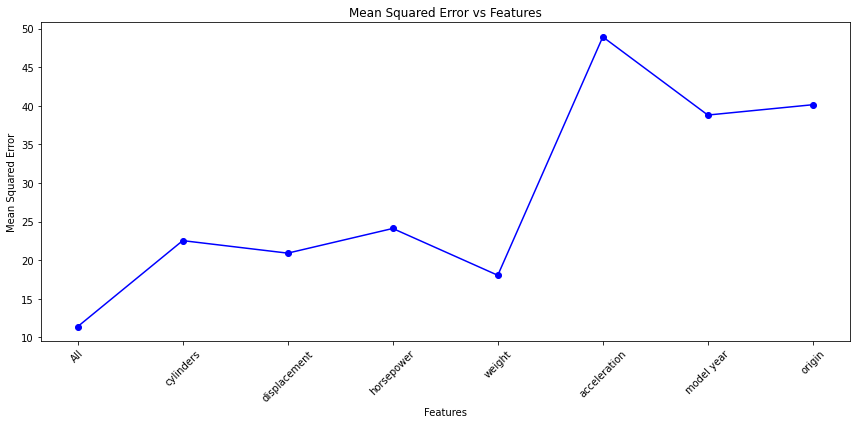

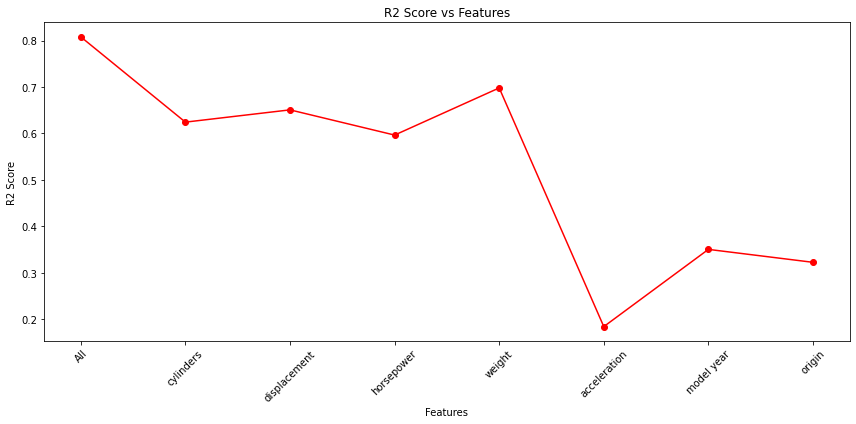

Average MSE (All features): 11.386986211633822
Average R2 Score (All features): 0.8078693976294702
cylinders - Average MSE: 22.5303, Average R2 Score: 0.6244
displacement - Average MSE: 20.9065, Average R2 Score: 0.6508
horsepower - Average MSE: 24.1047, Average R2 Score: 0.5965
weight - Average MSE: 18.0376, Average R2 Score: 0.6980
acceleration - Average MSE: 48.9343, Average R2 Score: 0.1842
model year - Average MSE: 38.8036, Average R2 Score: 0.3504
origin - Average MSE: 40.1432, Average R2 Score: 0.3226


In [30]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
X = df[features]  # Features (1-7)
y = df['mpg']  # Target variable (mpg)

# Initialize lists to store results
all_mse = []
all_r2 = []
feature_mse = [[] for _ in range(7)]
feature_r2 = [[] for _ in range(7)]

# Perform 10 iterations
for _ in range(10):
    # Step 1: Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0, 1000))
    
    # Step 2(a): Use all features
    model_all = LinearRegression()
    model_all.fit(X_train, y_train)
    y_pred_all = model_all.predict(X_test)
    
    # Calculate metrics for all features
    mse_all = mean_squared_error(y_test, y_pred_all)
    r2_all = r2_score(y_test, y_pred_all)
    all_mse.append(mse_all)
    all_r2.append(r2_all)
    
    # Step 3(a): Use each feature alone
    for i in range(7):
        model = LinearRegression()
        model.fit(X_train.iloc[:, i:i+1], y_train)
        y_pred = model.predict(X_test.iloc[:, i:i+1])
        
        # Calculate metrics for single feature
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        feature_mse[i].append(mse)
        feature_r2[i].append(r2)

# Calculate averages
avg_all_mse = np.mean(all_mse)
avg_all_r2 = np.mean(all_r2)
avg_feature_mse = [np.mean(mse) for mse in feature_mse]
avg_feature_r2 = [np.mean(r2) for r2 in feature_r2]

# Plotting
features = ['All'] + features

# MSE plot
plt.figure(figsize=(12, 6))
plt.plot(range(8), [avg_all_mse] + avg_feature_mse, 'bo-')
plt.xlabel('Features')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Features')
plt.xticks(range(8), features, rotation=45)
plt.tight_layout()
plt.show()

# R2 score plot
plt.figure(figsize=(12, 6))
plt.plot(range(8), [avg_all_r2] + avg_feature_r2, 'ro-')
plt.xlabel('Features')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Features')
plt.xticks(range(8), features, rotation=45)
plt.tight_layout()
plt.show()

# Print results
print("Average MSE (All features):", avg_all_mse)
print("Average R2 Score (All features):", avg_all_r2)
for i, feature in enumerate(features[1:]):  # Skip 'All'
    print(f"{feature} - Average MSE: {avg_feature_mse[i]:.4f}, Average R2 Score: {avg_feature_r2[i]:.4f}")

1. Based upon the linear models you generated, which feature appears to be most predictive for the target feature? Note that you can answer this question based upon the output provided for the linear models

Looking at the R-squared values for each feature from Step 2(b)

cylinders: 0.5726
displacement: 0.5841
horsepower: 0.5660
weight: 0.6533
acceleration: 0.2149
model year: 0.2668
origin: 0.2837

The feature with the highest R-squared value is "weight" with a score of 0.6533. This means that the weight of the vehicle explains about 65.33% of the variance in the MPG (miles per gallon) when used as the sole predictor in a linear regression model.

2. Suppose you need to select two features for a linear regression model to predict the target feature. Which two features would you select? Why?

Based on the model output, I would choose Weight and Model Year.

Weight:
- Highest R-squared (0.6533)
- Lowest MSE (17.6934)
- This feature performs best on both metrics, making it an obvious choice.


Model Year:
- While it has a lower R-squared (0.2668), it's not the lowest
- Its MSE (37.4228) is significantly better than acceleration and only slightly worse than origin
- More importantly, it likely provides information that's complementary to weight

Reasons for this selection:
- Complementary information: Model year likely provides information that's distinct from weight. While weight captures physical characteristics of the car, model year can capture technological improvements and changes in fuel efficiency standards over time.
- Potential for capturing trends: The auto industry has generally trended towards better fuel efficiency over time due to technological advancements and regulations. Model year could capture this trend.
- Avoiding multicollinearity: By choosing model year instead of displacement or cylinders (which have higher R-squared), we potentially reduce multicollinearity issues, as model year is less likely to be strongly correlated with weight.
- Balance of metrics: While displacement and cylinders have higher R-squared values, their MSE values are also higher. Model year offers a lower MSE, which directly measures the average squared difference between predicted and actual values.

In summary, this combination of weight and model year should provide a good balance of predictive power (from weight) and capturing temporal trends in fuel efficiency (from model year), while maintaining relatively low prediction error as measured by MSE.


3. Examine all the plots and numbers you have, do you have any comments on them? Do you find any surprising trends? Do you have any idea about what might be causing this surprising trend in the data? This is a descriptive question meant to encourage you to interpret your results and express yourself.

- There's a clear split in the predictive power of the features. Weight, displacement, cylinders, and horsepower have much higher R-squared values (between 0.56 and 0.65) compared to origin, model year, and acceleration (between 0.21 and 0.28). This suggests that the physical characteristics of the car (especially those related to size and power) are more predictive of MPG than other factors.

- Acceleration has the lowest R-squared (0.2149) and highest MSE (40.0739) among all features, which is counterintuitive. Even more surprisingly, it has a positive coefficient (1.1634), suggesting that cars with better acceleration tend to have slightly better MPG.

Why it's impressive: This challenges the common assumption that faster cars are always less fuel-efficient. It hints at complex engineering trade-offs and suggests that manufacturers have found ways to improve performance without sacrificing fuel economy.